In [1]:
#import modules

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# import os
# import re
# from scipy.ndimage import gaussian_filter

import plotting_functions as plot

['COMSOL_data/feedback_off/1V_pulse_x.txt', 'COMSOL_data/feedback_off/2V_pulse_x.txt', 'COMSOL_data/feedback_off/3V_pulse_x.txt', 'COMSOL_data/feedback_off/4V_pulse_x.txt', 'COMSOL_data/feedback_off/5V_pulse_x.txt']


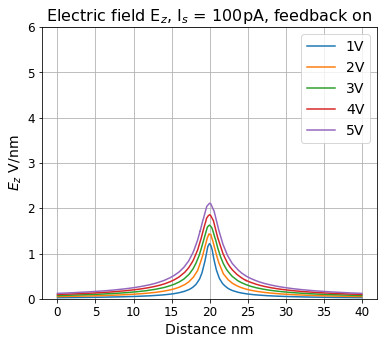

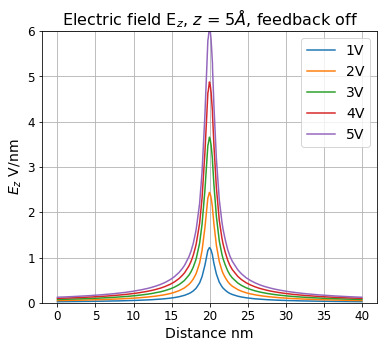

In [2]:
# feedback on
feedback_on_x, feedback_on_z = plot.generate_file_lists('COMSOL_data/feedback_on')
plot.plot_Ez(feedback_on_z, feedback='on', free_param=100)

#feedback off
feedback_off_x, feedback_off_z = plot.generate_file_lists('COMSOL_data/feedback_off')
plot.plot_Ez(feedback_off_z, feedback='off', free_param=5)

print(feedback_off_x)



In [3]:
# Specify the directory

def generate_file_lists(directory):
    """Generate lists of files in a directory with E_x and E_z

    Args:
        directory (str): file directory, eg. 'COMSOL_data/feedback_off/'
    Returns:
        x_files, z_files (array): Array of file names
    """

    # directory = 'COMSOL_data'
    # current = 400 # current set point for this dataset -> may change

    z_files = []
    x_files = []

    # Iterate over all files in the directory
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        # Check if it's a file (not a subdirectory)
        if os.path.isfile(file_path):
            if 'pulse_x.txt' in file_path:
                x_files.append(file_path)
            if 'pulse_z.txt' in file_path:
                z_files.append(file_path)
    
    return x_files, z_files

In [4]:
#Plot E_z data

def plot_Ez(z_files, feedback):

    colors = ['r','m','c']
    i=0
    current = ''
    
    plt.figure(figsize=(10, 6))
    plt.rcParams.update({
        'axes.labelsize': 14,    # Axis labels font size
        'xtick.labelsize': 12,   # X-tick labels font size
        'ytick.labelsize': 12,   # Y-tick labels font size
        'axes.titlesize': 16     # Title font size
    })

    for file in z_files:
        df = pd.read_csv(file, delimiter='\t')
        voltage = file.split('/')[1].split('V')[0]

        df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
        df = df[7:]

        df['Distance'] = pd.to_numeric(df['Distance'])
        df['E_field'] = pd.to_numeric(df['E_field'])

        # Create the plot
        plt.plot(df['Distance'], df['E_field'], marker='', color=colors[i], linestyle='-', label=f'{voltage}V')
        
        i+=1

        # Add titles and labels
        plt.title(f'Electric field E$_z$, I$_s$ = {current}pA')
        plt.xlabel('Distance nm')
        plt.ylabel('$E_z$ V/nm')
        plt.xlim(20, 30)
        plt.legend(fontsize=14)
        plt.grid(True)

# plt.savefig('figures/E_z.png')

In [5]:
#plot E_x data

colors = ['r','m','c']
i=0

plt.figure(figsize=(10, 6))

for file in x_files:
    df = pd.read_csv(file, delimiter='\t')
    voltage = file.split('/')[1].split('V')[0]

    df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
    df = df[7:]

    df['Distance'] = pd.to_numeric(df['Distance'])
    df['E_field'] = gaussian_filter(pd.to_numeric(df['E_field']), sigma=2)

    # Create the plot
    plt.plot(df['Distance'], df['E_field'], marker='', color=colors[i], linestyle='-', label=f'{voltage}V')
    
    i+=1

    # Add titles and labels
    plt.title('Electric field $E_{||}$, $I_s$ = ' + str(current) + 'pA')   
    plt.xlabel('Distance nm')
    plt.ylabel('$E_x$ V/nm')
    plt.legend(fontsize=14)
    plt.grid(True)
    plt.xlim(10,40)

# plt.savefig('figures/E_x.png')

NameError: name 'plt' is not defined

In [ ]:
#plot Ez, Ex on same axis:

def plotEzEx(x_files, z_files, set_voltage):
    """Plot Ex and Ez on same axis

    Args:
        x_files (_type_): _description_
        z_files (_type_): _description_
        set_voltage (_type_): _description_
    """
    
    setV = str(set_voltage)
    plt.figure(figsize=(10, 6))

    for file in x_files:
        df = pd.read_csv(file, delimiter='\t')
        voltage = file.split('/')[1].split('V')[0]
        
        if voltage == setV:
            df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
            df = df[7:]

            df['Distance'] = pd.to_numeric(df['Distance'])
            df['E_field'] = gaussian_filter(pd.to_numeric(df['E_field']).abs(), sigma=1)
            
            plt.plot(df['Distance'], df['E_field'], marker='', color='r', linestyle='--', label='$E_{||}$')
            

            # Add titles and labels
            plt.title('Electric field, $I_s$ = ' + str(current) + 'pA, voltage = ' + setV + 'V')   
            plt.xlabel('Distance nm')
            plt.ylabel('$E$ V/nm')
            
            # set xlim based on 'd'
            distance = np.max(df['Distance'])
            plt.xlim((distance/2), 45)

            plt.yscale('log')
        
    for file in z_files:
        df = pd.read_csv(file, delimiter='\t')
        voltage = file.split('/')[1].split('V')[0]
        
        if voltage == setV:
            df[['Distance', 'E_field']] = df['% Model:              STM_tip.mph'].str.split(' ', 1, expand=True)
            df = df[7:]

            df['Distance'] = pd.to_numeric(df['Distance'])
            # df['E_field'] = pd.to_numeric(df['E_field']).abs()
            df['E_field'] = gaussian_filter(pd.to_numeric(df['E_field']).abs(), sigma=1)
            
            
            plt.plot(df['Distance'], df['E_field'], marker='', color='b', linestyle='--', label='$E_z$')
            
            plt.legend(fontsize=14)
            plt.grid(True)
        
        

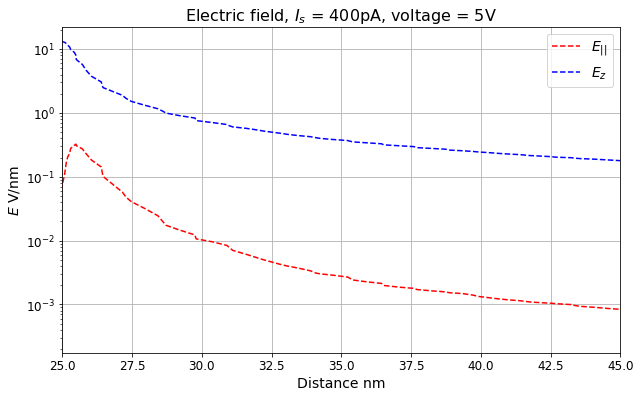

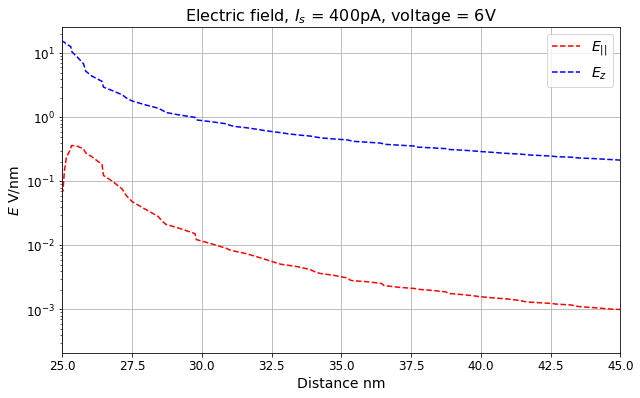

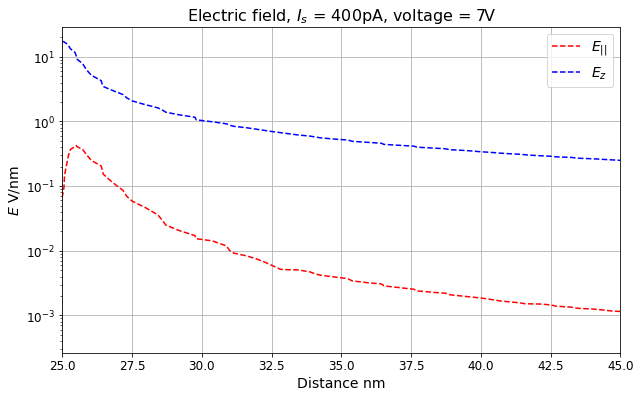

In [ ]:
voltages = [5,6,7]
for v in voltages:
    plotEzEx(x_files, z_files, v)